# Time Series Forecasting with Python (ARIMA, LSTM)

In [2]:
!pip install pmdarima -q

     |████████████████████████████████| 1.8 MB 6.2 MB/s 
     |████████████████████████████████| 9.9 MB 45.9 MB/s 


In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

In this article we will try to forecast a time series data basically. We'll build three different model with Python and inspect their results. Models we will use are ARIMA (Autoregressive Integrated Moving Average), LSTM (Long Short Term Memory Neural Network)

## ARIMA (Autoregressive Integrated Moving Average)


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/arima.png" width="1200">

ARIMA is a model which is used for predicting future trends on a time series data. It is model that form of regression analysis. 
* **AR (Autoregression) :** Model that shows a changing variable that regresses on its own lagged/prior values.
* **I (Integrated) :**  Differencing of raw observations to allow for the time series to become stationary
* **MA (Moving average) :** Dependency between an observation and a residual error from a moving average model

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

* **p:** the number of lag observations in the model; also known as the lag order.
* **d:** the number of times that the raw observations are differenced; also known as the degree of differencing.
* **q:** the size of the moving average window; also known as the order of the moving average.

For more information about ARIMA you can check:
<br>
[What is ARIMA](https://www.quora.com/What-is-ARIMA)
<br>
[Autoregressive Integrated Moving Average (ARIMA)](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/sarima.png" width="1200">

## LSTM Neural Network

> LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.
> LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers, like this:

![](https://hub.packtpub.com/wp-content/uploads/2018/04/LSTM-696x494.png)

> LSTM work
There are three types of gates within a unit:
Input Gate: Scales input to cell (write)
Output Gate: Scales output to cell (read)
Forget Gate: Scales old cell value (reset)
Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

For more detail:
<br>
[What is LSTM?](https://hub.packtpub.com/what-is-lstm/)
<br>
[What is LSTM? - Quora](https://www.quora.com/What-is-LSTM)
<br>
[Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

# FORECAST BEER PRODUCTION


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/beer.jpg" width="1200">

## Read Dataset

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/monthly-beer-production-in-austr.csv
df = pd.read_csv('monthly-beer-production-in-austr.csv')

--2022-11-21 16:05:25--  https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/monthly-beer-production-in-austr.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 3.5.244.142
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|3.5.244.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6426 (6.3K) [application/vnd.ms-excel]
Saving to: ‘monthly-beer-production-in-austr.csv.1’

monthly-beer-produc 100%[===================>]   6.28K  --.-KB/s    in 0s      

2022-11-21 16:05:26 (87.6 MB/s) - ‘monthly-beer-production-in-austr.csv.1’ saved [6426/6426]



In [3]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df.Month = pd.to_datetime(df.Month)

In [6]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [7]:
df.index.freq = 'MS'

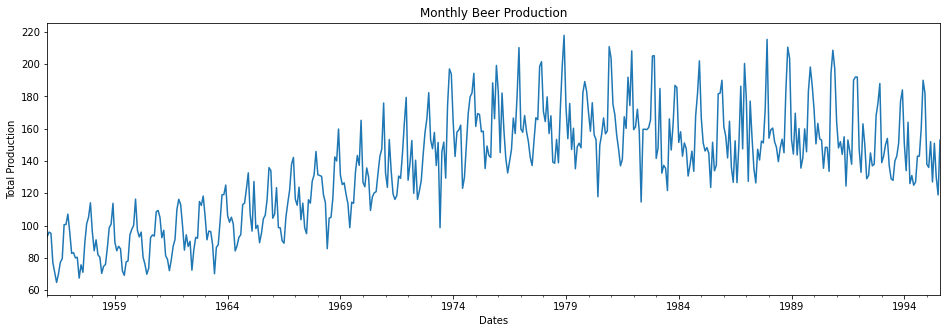

In [8]:
ax = df['Monthly beer production'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

When we look at plot we can sey there is a seasonality in data. That's why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

> Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.
> It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

> There are four seasonal elements that are not part of ARIMA that must be configured; they are:<br>
**P:** Seasonal autoregressive order.<br>
**D:** Seasonal difference order.<br>
**Q:** Seasonal moving average order.<br>
**m:** The number of time steps for a single seasonal period.<br>

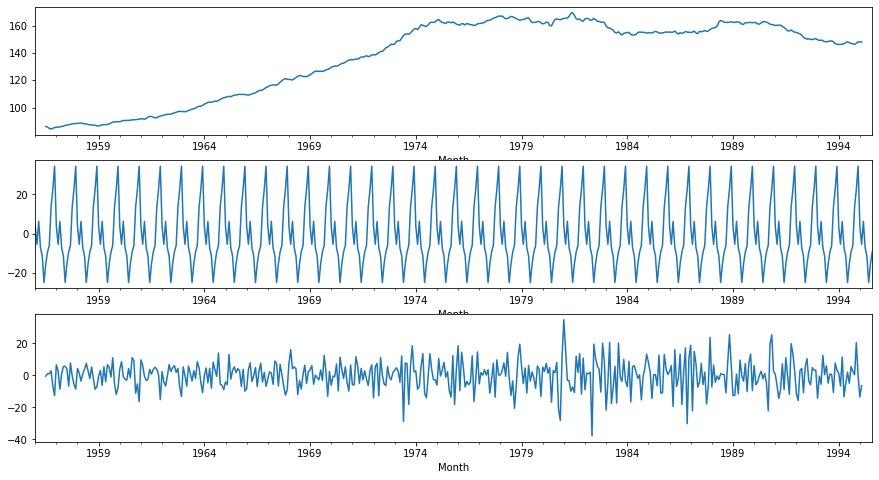

In [9]:
import matplotlib.pyplot as plt

a = seasonal_decompose(df["Monthly beer production"], model = "add")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
a.trend.plot(ax=ax1)
a.seasonal.plot(ax=ax2)
a.resid.plot(ax=ax3)

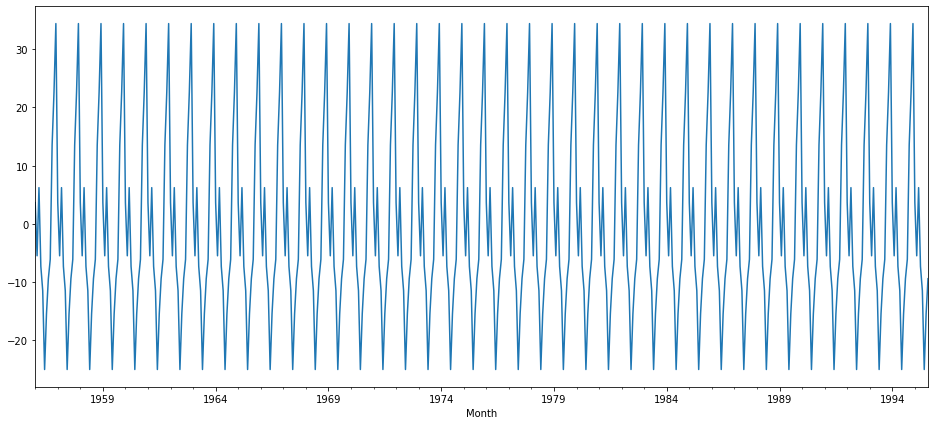

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

### Training - Test

In [11]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

## ARIMA Forecast

### Information Criteria
Akaike’s Information Criterion (AIC), which was useful in selecting predictors for regression, is also useful for determining the order of an ARIMA model. It can be written as
AIC
=
−
2
log
(
L
)
+
2
(
p
+
q
+
k
+
1
)
,
 
where  
L
  is the likelihood of the data,  
k
=
1
  if  
c
≠
0
  and  
k
=
0
  if  
c
=
0
 . Note that the last term in parentheses is the number of parameters in the model (including  
σ
2
 , the variance of the residuals).

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [12]:
from pmdarima import auto_arima        
import pmdarima as pm    

- P : Seasonal autoregressive order. --> AR
- D : Seasonal difference order.     --> I
- Q : Seasonal moving average order. --> MA
- m : The number of time steps for a single seasonal period. --> month

In [ ]:
%%time 

model = pm.auto_arima(df['Monthly beer production'],
           seasonal=True, 
           m=12,
           max_p=5, 
           max_d=4,
           max_q=4, 
           max_P=4, 
           max_D=4,
           max_Q=4,
           error_action='ignore',
           suppress_warnings=True,
           trace=True
           )

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(5, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -1724.209
Date:                              Mon, 21 Nov 2022   AIC                           3472.418
Time:                                      15:59:10   BIC                           3522.378
Sample:                                  01-01-1956   HQIC                          3492.065
                                       - 08-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2184      0.054     -4.039      0.000      -0.324      -0.112
ar.L2         -0.0917      0.058     -1.581      0.114      -0.205       0.022
ar.L3          0.7245      0.056     13.050      0.000       0.616       0.833
ar.L4         -0.1687      0.049     -3.470      0.001      -0.264      -0.073
ar.L5         -0.0008      0.049     -0.017      0.987      -0.096       0.095
ma.L1         -0.7488      0.036    -21.086      0.000      -0.818      -0.679
ma.L2         -0.1680      0.030     -5.648      0.000      -0.226      -0.110
ma.L3         -0.7888      0.028    -28.189      0.000      -0.844      -0.734
ma.L4          0.8544      0.031     27.125      0.000       0.793       0.916
ar.S.L12       0.9944      0.005    216.843      0.000       0.985       1.003
ma.S.L12      -0.8103      0.037    -21.894      0.000      -0.883      -0.738
sigma2        77.8171      4.137     18.810      0.000      69.709      85.926
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                74.30
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As we can see best arima model chosen by auto_arima() is SARIMAX(5, 1, 4)x(1, 0, 1, 12)

In [14]:
arima_model = SARIMAX(train_data['Monthly beer production'],
                      order = (5,1,4), 
                      seasonal_order = (1,0,1,12)
                      )

arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Monthly beer production   No. Observations:                  464
Model:             SARIMAX(5, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -1680.787
Date:                              Mon, 21 Nov 2022   AIC                           3385.574
Time:                                      16:06:01   BIC                           3435.227
Sample:                                  01-01-1956   HQIC                          3405.121
                                       - 08-01-1994                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2905      0.062     -4.661      0.000      -0.413      -0.168
ar.L2         -0.1701      0.069     -2.470      0.014      -0.305      -0.035
ar.L3          0.6600      0.073      9.091      0.000       0.518       0.802
ar.L4         -0.1683      0.050     -3.379      0.001      -0.266      -0.071
ar.L5         -0.0003      0.051     -0.007      0.995      -0.100       0.100
ma.L1         -0.6925      0.048    -14.358      0.000      -0.787      -0.598
ma.L2         -0.1698      0.030     -5.755      0.000      -0.228      -0.112
ma.L3         -0.7853      0.028    -28.388      0.000      -0.839      -0.731
ma.L4          0.8111      0.042     19.505      0.000       0.730       0.893
ar.S.L12       0.9958      0.004    276.423      0.000       0.989       1.003
ma.S.L12      -0.8188      0.034    -24.034      0.000      -0.886      -0.752
sigma2        74.6022      3.858     19.337      0.000      67.041      82.164
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.81
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.69   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    134.739593
1994-10-01    156.912933
1994-11-01    179.036193
1994-12-01    181.383422
1995-01-01    140.449498
1995-02-01    139.237093
1995-03-01    147.552525
1995-04-01    132.620891
1995-05-01    136.596968
1995-06-01    116.520487
1995-07-01    128.050877
1995-08-01    139.708426
Freq: MS, Name: ARIMA Predictions, dtype: float64

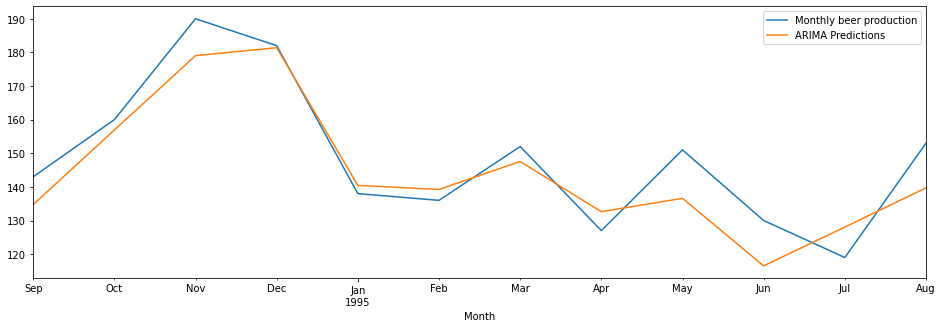

In [16]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [17]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 76.16097741817781
RMSE Error: 8.72702569138981
Mean: 136.3953781512605


In [18]:
test_data['ARIMA_Predictions'] = arima_pred

## LSTM Forecast

First we'll scale our train and test data with MinMaxScaler

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
scaler.fit(train_data)
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.fit_transform(test_data)

Before creating LSTM model we should create a Time Series Generator object.

In [21]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, 
                                scaled_train_data, 
                                length=n_input, 
                                batch_size=1
                                )

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [23]:
lstm_model.fit_generator(generator,
                         epochs=20
                         )

Epoch 1/20
452/452 [==============================] - 4s 6ms/step - loss: 0.0229
Epoch 2/20
452/452 [==============================] - 3s 6ms/step - loss: 0.0165
Epoch 3/20
452/452 [==============================] - 3s 6ms/step - loss: 0.0127
Epoch 4/20
452/452 [==============================] - 3s 6ms/step - loss: 0.0103
Epoch 5/20
452/452 [==============================] - 3s 6ms/step - loss: 0.0084
Epoch 6/20
452/452 [==============================] - 3s 6ms/step - loss: 0.0077
Epoch 7/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0074
Epoch 8/20
452/452 [==============================] - 3s 6ms/step - loss: 0.0069
Epoch 9/20
452/452 [==============================] - 3s 6ms/step - loss: 0.0069
Epoch 10/20
452/452 [==============================] - 4s 9ms/step - loss: 0.0064
Epoch 11/20
452/452 [==============================] - 3s 7ms/step - loss: 0.0070
Epoch 12/20
452/452 [==============================] - 3s 6ms/step - loss: 0.0064
Epoch 13/20
452/452 [====

In [24]:
# losses_lstm = lstm_model.history.history['loss']
# plt.figure(figsize=(12,4))
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.xticks(np.arange(0,21,1))
# plt.plot(range(len(losses_lstm)),losses_lstm);

In [25]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))
current_batch[0]

array([[0.51111111],
       [0.56339869],
       [0.73333333],
       [0.77908497],
       [0.56339869],
       [0.45228758],
       [0.64836601],
       [0.4       ],
       [0.43267974],
       [0.39346405],
       [0.40653595],
       [0.51111111]])

In [26]:
for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


As you know we scaled our data that's why we have to inverse it to see true predictions.

In [27]:
lstm_predictions_scal = []

for i in lstm_predictions_scaled:
    lstm_predictions_scal.append(i[0])

lstm_predictions_scal = np.array(lstm_predictions_scal).reshape(-1,1)
aa = np.append(lstm_predictions_scal,lstm_predictions_scal,1)
#aa = np.append(aa,lstm_predictions_scal,1)
lstm_predictions = scaler.inverse_transform(aa)
lstm_predictions = lstm_predictions[:,0].reshape(-1,1)
lstm_predictions

array([[157.86662],
       [164.61638],
       [173.50114],
       [172.08789],
       [159.62021],
       [157.52705],
       [161.32071],
       [151.79433],
       [151.61775],
       [150.6042 ],
       [152.1878 ],
       [156.52191]], dtype=float32)

In [28]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions
Month,,,
1994-09-01,143.0,134.739593,157.866623
1994-10-01,160.0,156.912933,164.616379
1994-11-01,190.0,179.036193,173.501144
1994-12-01,182.0,181.383422,172.087891
1995-01-01,138.0,140.449498,159.620209
1995-02-01,136.0,139.237093,157.527054
1995-03-01,152.0,147.552525,161.320709
1995-04-01,127.0,132.620891,151.794327
1995-05-01,151.0,136.596968,151.617752


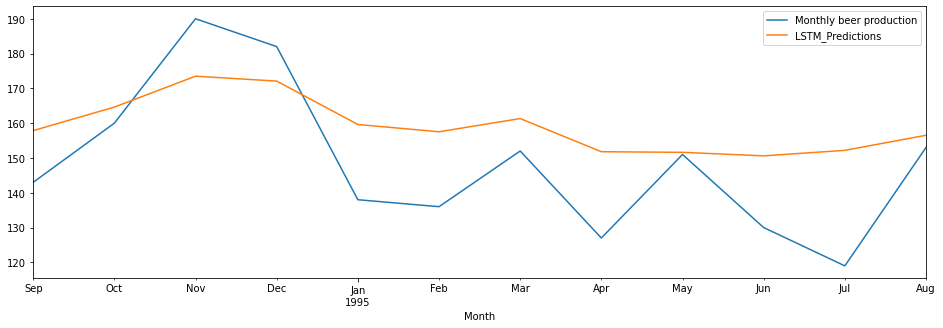

In [29]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [30]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 315.33502956881415
RMSE Error: 17.757675229849603
Mean: 136.3953781512605


In [31]:
rmse_errors = [arima_rmse_error, lstm_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM"],
                       "RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

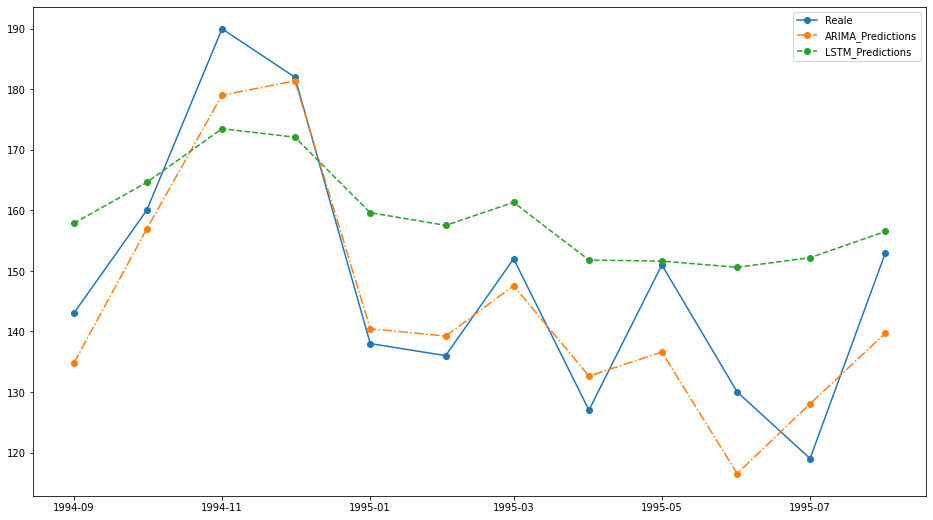

In [32]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-",label='Reale')
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.",label='ARIMA_Predictions')
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--",label='LSTM_Predictions')
plt.legend()


In [33]:
print(f"Mean: {test_data['Monthly beer production'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.727026,76.160977
1,LSTM,17.757675,315.335030


In [34]:
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions
Month,,,
1994-09-01,143.0,134.739593,157.866623
1994-10-01,160.0,156.912933,164.616379
1994-11-01,190.0,179.036193,173.501144
1994-12-01,182.0,181.383422,172.087891
1995-01-01,138.0,140.449498,159.620209
1995-02-01,136.0,139.237093,157.527054
1995-03-01,152.0,147.552525,161.320709
1995-04-01,127.0,132.620891,151.794327
1995-05-01,151.0,136.596968,151.617752


In [35]:
test_data.to_excel('export.xlsx')